In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('IMDB Dataset.csv.zip')

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


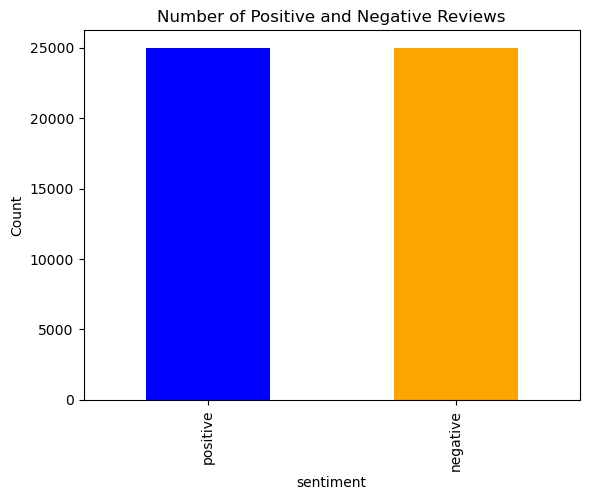

In [5]:
sentiment_counts = data["sentiment"].value_counts()
sentiment_counts.plot(kind="bar", color=["blue", "orange"], title="Number of Positive and Negative Reviews")
plt.xlabel("sentiment")
plt.ylabel("Count")
plt.show()

In [6]:
from nltk.corpus import stopwords
import nltk

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Vishakha
[nltk_data]     Bhavsar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stop_words = set(stopwords.words('english'))

In [9]:
def clean_review(review):
    str = ' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [10]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from wordcloud import WordCloud

In [12]:
#to display the frequently used words in Negative Sentiment Section
print(data[data['sentiment'] == 'negative'].head())

                                               review sentiment
3   Basically there's a family where a little boy ...  negative
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative


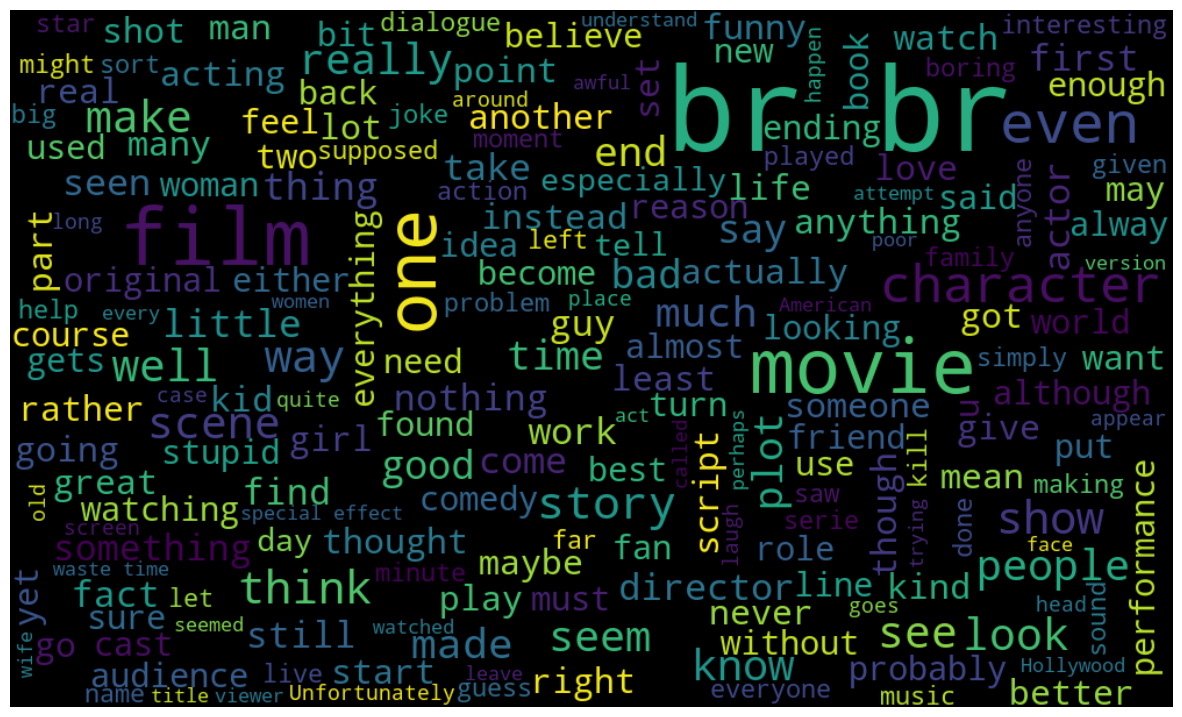

In [14]:
#word cloud visually represents the frequency of words in text data, where larger words indicate higher importance or occurrence

reviews = ' '.join(
    word for review in data['review'][data['sentiment'] == 'negative'].astype(str)
    for word in review.split() if word.lower() not in stop_words
) 
wordcloud = WordCloud(height = 600, width =1000, max_font_size =100)
plt.figure(figsize =(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
#to display the frequently used words in Negative Sentiment Section
print(data[data['sentiment'] == 'positive'].head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive


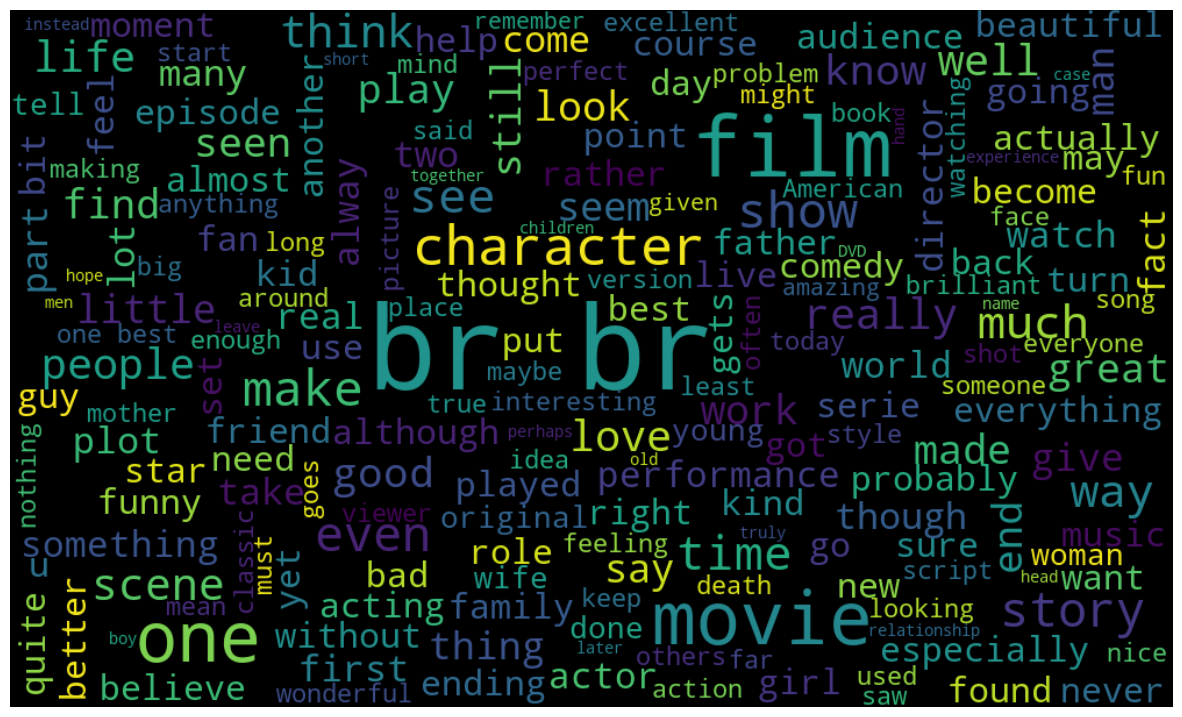

In [16]:
reviews = ' '.join(
    word for review in data['review'][data['sentiment'] == 'positive'].astype(str)
    for word in review.split() if word.lower() not in stop_words
) 
wordcloud = WordCloud(height = 600, width =1000, max_font_size =100)
plt.figure(figsize =(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
cv = TfidfVectorizer(max_features= 2500)

In [22]:
reviews= cv.fit_transform(data['review']).toarray()

In [24]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [25]:
data['sentiment']= data['sentiment'].replace(['positive', 'negative'], [1,0])

In [26]:
data['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [28]:
model = LogisticRegression()

In [29]:
from sklearn.model_selection import train_test_split

In [35]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [37]:
model.fit(reviews_train, sent_train)

LogisticRegression()

In [38]:
model.score(reviews_train, sent_train)

0.9017

In [39]:
model.score(reviews_test, sent_test)

0.8836

In [43]:
predict = model.predict(reviews_test)

In [45]:
accuracy = accuracy_score(sent_test, predict)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 88.36%


In [47]:
print('Classification Report:')
print(classification_report(sent_test, predict, zero_division=1))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5005
           1       0.87      0.90      0.88      4995

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

